<a href="https://colab.research.google.com/github/anushka7220/Hedging-of-Financial-Derivatives/blob/main/forex/forex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow
!pip install keras


In [ ]:
!pip install yfinance


In [ ]:
import yfinance as yf
import pandas as pd

# Step 1: Fetch historical exchange rate data
def get_exchange_rate_data(base_currency='USD', target_currency='EUR', start_date='2010-01-01', end_date='2024-01-01'):
    ticker = f'{base_currency}{target_currency}=X'
    data = yf.download(ticker, start=start_date, end=end_date)
    return data

exchange_rates = get_exchange_rate_data(start_date='2010-01-01', end_date='2024-01-01')

# Step 2: Prepare data for training
df = exchange_rates[['Close']].rename(columns={'Close': 'Rate'})

# Step 3: Continue with the rest of your code to prepare the data, build and train the LSTM model, and make predictions.


[*********************100%%**********************]  1 of 1 completed


In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [ ]:
# Step 2: Prepare data for training
data = df['Rate'].values.reshape(-1, 1)

In [ ]:
#Scale the data to a range between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)


In [ ]:
# Create sequences of historical exchange rate values
sequence_length = 30  # Number of previous days to consider
X, y = [], []
for i in range(len(scaled_data) - sequence_length):
    X.append(scaled_data[i:i+sequence_length])
    y.append(scaled_data[i+sequence_length])

X = np.array(X)
y = np.array(y)


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Step 3: Build the LSTM model
model = Sequential()
model.add(LSTM(units=128, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=64, return_sequences=False))
model.add(Dense(units=1))


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Step 4: Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test), verbose=1)


Epoch 1/50
46/46 [==============================] - 13s 184ms/step - loss: 0.0162 - val_loss: 0.0011
Epoch 2/50
46/46 [==============================] - 4s 97ms/step - loss: 7.7362e-04 - val_loss: 7.5109e-04
Epoch 3/50
46/46 [==============================] - 9s 209ms/step - loss: 6.6720e-04 - val_loss: 7.5947e-04
Epoch 4/50
46/46 [==============================] - 6s 130ms/step - loss: 6.5302e-04 - val_loss: 7.0224e-04
Epoch 5/50
46/46 [==============================] - 9s 198ms/step - loss: 6.2874e-04 - val_loss: 6.7900e-04
Epoch 6/50
46/46 [==============================] - 8s 168ms/step - loss: 6.0464e-04 - val_loss: 6.5665e-04
Epoch 7/50
46/46 [==============================] - 11s 240ms/step - loss: 5.9347e-04 - val_loss: 6.4056e-04
Epoch 8/50
46/46 [==============================] - 10s 214ms/step - loss: 5.8418e-04 - val_loss: 6.1300e-04
Epoch 9/50
46/46 [==============================] - 6s 123ms/step - loss: 6.3573e-04 - val_loss: 5.9115e-04
Epoch 10/50
46/46 [===============

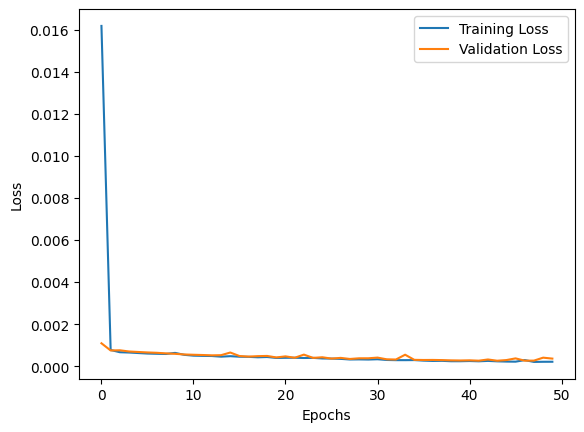

In [ ]:
# Step 5: Evaluate the model
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Step 6: Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)


23/23 [==============================] - 1s 22ms/step


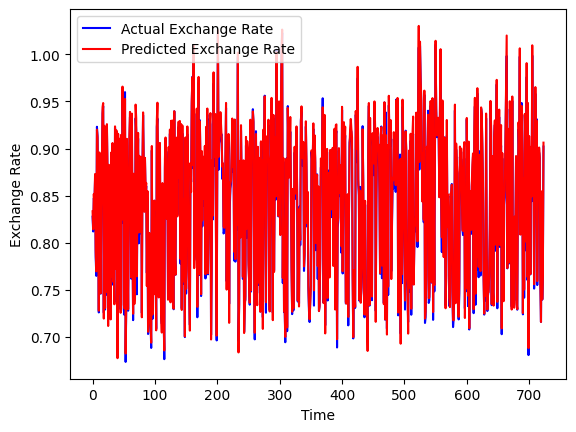

In [ ]:
# Step 7: Visualize the results
plt.plot(y_test, color='blue', label='Actual Exchange Rate')
plt.plot(predictions, color='red', label='Predicted Exchange Rate')
plt.xlabel('Time')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()